In [1]:
import random
import numpy as np
from scipy.stats import norm 
import matplotlib.pyplot as plt

In [2]:
sigma_u = 1
vp_1 = 4
vp_2 = 2
sigma_p_1 = 1
sigma_p_2 = 1
dt = 0.01

In [3]:
v_1 = np.random.normal(vp_1, np.sqrt(sigma_p_1), 1000).tolist()
v_2 = np.random.normal(vp_2, np.sqrt(sigma_p_2), 1000).tolist()

In [4]:
error_u = []
error_v = []

error_u_num=0
error_u_num_100 = []

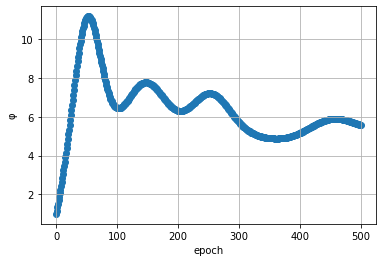

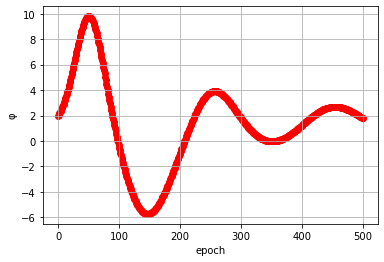

u: 7.043459500964331
v_1: 5.062803810651189
v_2: 1.9806556903131423
g(φ1,φ2): 7.382719676513231
phi_1: 5.577867025688536
phi_2: 1.8048526508246954
sigma_p_1: 1
sigma_p_2: 1.6762669362146525
sigma_u: 1


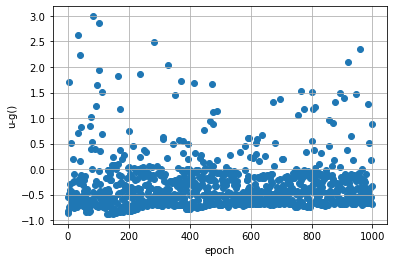

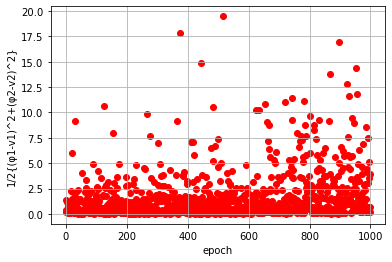

28
43
50
50
53
46
43
62
56


In [5]:
for i in range(1000):
    u = v_1[i] + v_2[i]
    phi_1 = list(range(500))
    phi_1[0] = 1
    phi_2 = list(range(500))
    phi_2[0] = 2
    ep_1 = list(range(500))
    ep_1[0] = (phi_1[0] - vp_1) / sigma_p_1
    ep_2 = list(range(500))
    ep_2[0] = (phi_2[0] - vp_2) / sigma_p_2
    eu = list(range(500))
    eu[0] = (u - (phi_1[0] + phi_2[0])) / sigma_u
    
    # 推測
    for j in range(1, 500):
        phi_1[j] = phi_1[j-1] + dt * (-ep_1[j-1] + eu[j-1] * (1 + phi_2[j-1]))
        phi_2[j] = phi_2[j-1] + dt * (-ep_2[j-1] + eu[j-1] * (1 + phi_1[j-1]))
#         phi_1[j] = max(phi_1[j-1] + dt * (-ep_1[j-1] + eu[j-1] * (1 + phi_2[j-1])), 0)
#         phi_2[j] = max(phi_2[j-1] + dt * (-ep_2[j-1] + eu[j-1] * (1 + phi_1[j-1])), 0)
        ep_1[j] = ep_1[j-1] + dt * (phi_1[j-1] - vp_1 - sigma_p_1 * ep_1[j-1])
        ep_2[j] = ep_2[j-1] + dt * (phi_2[j-1] - vp_2 - sigma_p_2 * ep_2[j-1])
        eu[j] = eu[j-1] + dt * (u - phi_1[j-1] - phi_2[j-1] - sigma_u * eu[j-1])
        
    error_u.append(u - (phi_1[-1] + phi_2[-1]))
    error_v.append(1/2 * ((v_1[i] - phi_1[-1]) ** 2 + (v_2[i] - phi_2[-1]) ** 2))
#     error_v.append(v_1[i] - phi_1[-1])

    if (i != 0):
        if (-0.5 <= u - (phi_1[-1] + phi_2[-1]) < 0.5 ):
            error_u_num += 1

        if (i % 100 == 0):
            error_u_num_100.append(error_u_num)
            error_u_num = 0
        

    # 学習
    vp_1 = vp_1 + ep_1[-1] * dt
    vp_2 = vp_2 + ep_2[-1] * dt
    sigma_p_1 = max(sigma_p_1 + 1/2 * (ep_1[-1]**2 - 1/sigma_p_1), 1)
    sigma_p_2 = max(sigma_p_2 + 1/2 * (ep_2[-1]**2 - 1/sigma_p_2), 1)
    sigma_u = max(sigma_u + 1/2 * (eu[-1]**2 - 1/sigma_u), 1) 

plt.scatter(range(500), phi_1)
plt.xlabel("epoch")
plt.ylabel("φ")
plt.plot()
plt.grid()
plt.show()

plt.scatter(range(500), phi_2, color='r')
plt.xlabel("epoch")
plt.ylabel("φ")
plt.plot()
plt.grid()
plt.show()
    
print("u:", u)
print("v_1:", v_1[-1])
print("v_2:", v_2[-1])
print("g(φ1,φ2):", phi_1[-1]+phi_2[-1])
print("phi_1:", phi_1[-1])
print("phi_2:", phi_2[-1])
print("sigma_p_1:", sigma_p_1)
print("sigma_p_2:", sigma_p_2)
print("sigma_u:" , sigma_u)

plt.scatter(range(1000), error_u)
plt.xlabel("epoch")
plt.ylabel("u-g()")
plt.plot()
plt.grid()
plt.show()

plt.scatter(range(1000), error_v, color="r")
plt.xlabel("epoch")
plt.ylabel("1/2{(φ1-v1)^2+(φ2-v2)^2}")
plt.plot()
plt.grid()
plt.show()

for i in error_u_num_100:
    print(i)